Hypothetical interaction

In [15]:
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt
import actrme
import pandas as pd
import modules.module
import modules.declarative as dm
import pandas as pd


# Sandbox

In [36]:
reload(modules.module)

ImportError: attempted relative import beyond top-level package

In [88]:
#reload(modules.module)
o = modules.module.SymbolicInput("test")
print(o)
o.value = dict(zero="ops")
o.value
print(o)

<[I] test = {}>
<[I] test = {'zero': 'ops'}>


In [65]:
o.modify(dict(uno="ops2"))
o.value

{'zero': 'ops', 'uno': 'ops2'}

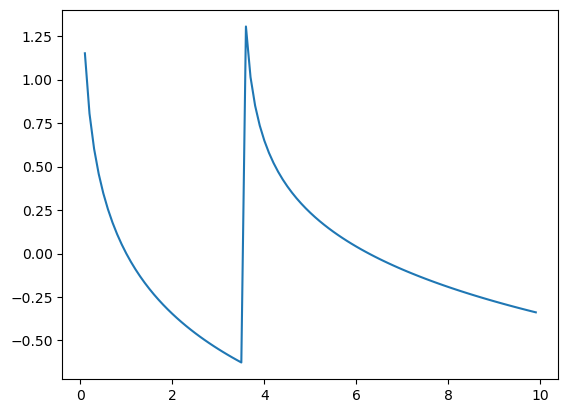

In [19]:
from modules.declarative import Memory
reload(modules.declarative)
m = Memory(contents=dict(english="Fish", swahili="Samaki"))
m.add_trace(time=3.5)
x = np.arange(0.1, 10, 0.1)
y = [m.activation(t) for t in x]
plt.plot(x, y)

In [50]:
from modules.declarative import DeclarativeMemory
reload(modules.declarative)
dm = DeclarativeMemory()
dm.encode(contents=dict(english="Fish", swahili="Samaki"))
dm.encode(contents=dict(english="Chair", swahili="Kaliki"))
dm.time = 2.0
dm.encode(contents=dict(english="Chair", swahili="Kaliki"))
dm._memories

[<Memory [1] {'english': 'Fish', 'swahili': 'Samaki'}>,
 <Memory [2] {'english': 'Chair', 'swahili': 'Kaliki'}>]

In [51]:
dm.retrieve(dict(english="Fish"))

<Memory [1] {'english': 'Fish', 'swahili': 'Samaki'}>

# Examples

Here is a list of examples.

## 1. A Memory Experiment

We will start with a memory experoiment. The experiment is taken from a paper by Xu et al. (2025), and the original data is available on OSF.

The experiment used a retrieval practice procedure: Participants are presented with simple paired associates, e.g., a pair of Swahili-English words, such as "samaki/fish". Each pair is presented during a study trial, and then probed in a series of test trials.

In [52]:
data = pd.read_csv("data/memory_experiment.csv")
data

,subj,item,resp,RT,type,time,acc
0,1501,3,fish,2.295,study,3.131,1
1,1501,3,fish,0.888,test,5.426,1
2,1501,12,book,3.128,study,10.248,1
3,1501,12,book,0.841,test,12.776,1
4,1501,2,beer,4.203,study,18.824,1
...,...,...,...,...,...,...,...
146,1501,10,cloud,2.137,test,712.918,1
147,1501,5,office,1.025,test,715.292,1
148,1501,12,book,0.975,test,717.400,1
149,1501,16,work,1.042,test,719.503,1


This is an alteration of "study" and "test" trials. 

### Creating a model

To fit the data, we need to create a simple model. Fitting the data means that the model is run trial by trial to maximize the probability of responding exactly like the participant.

To do so, we need to create a `DataModel`, which is a generic name for a model simulates behavior or performance "tracing".

In [155]:
model = me.DataModel(data)
model

Now, we have not yet specified how the model works. In this example, we will create a simple model that does only one thing: encodes things on study trials, and attempts to retrieve them on test trials. To do so, we need to add a new cognitive function to the model, Declarative Memory. 

In [172]:
dm = basic.DeclarativeMemory()
model.add_module(dm)

In [ ]:

# DM has 3 inputs (encode, time, retrieve), so all of these inputs are 
# now part of the model's inputs.
model.inputs()

# This should return
#    > model.inputs()
#    > ["encode", "time", "retrieve"]
# 

# DM has 2 outputs (response, rt), so all of these outputs are 
# now part of the model's outputs.
model.outputs()

# This should return
#    > model.outputs()
#    > ["rt", "response", "response_probability", "rt_probability"]
# 

# Now, connect the model to the file

model.connect_input("encode", data.study)
model.connect_input("time", data.time)
model.connect_input("retrieve", data.cue)

# We want to simply maximize the probability of a response

model.connect_output("probability", data.acc)

# Now fit:
model.fit()

# now, this will go trial-by-trial over the probabilities
for row in data:
    if encode is not None:
        dm.learn()